In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
pred_y = ['m', 'b', 'm', 'b', 'm', 'b', 'b', 'b']
real_y = ['m', 'm', 'm', 'b', 'b', 'b', 'm', 'm']

In [4]:
accuracy = accuracy_score(real_y, pred_y)
accuracy

0.5

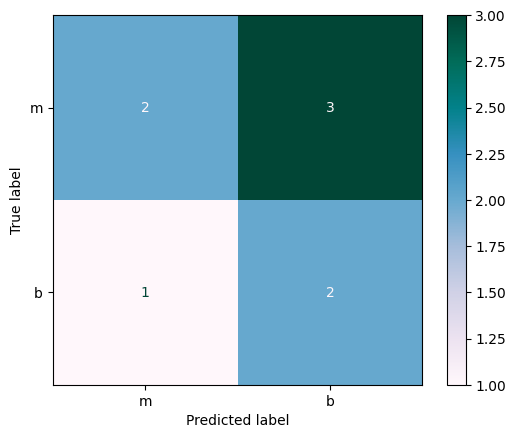

In [6]:
#confusion matrix
cm = confusion_matrix(real_y, pred_y, labels=['m','b'])
#visualization the matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['m','b'])
cmd.plot(cmap='PuBuGn')
plt.show()

In [7]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


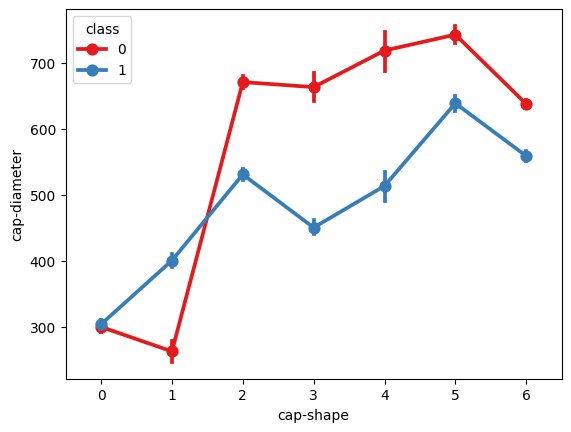

In [8]:
sns.pointplot(data=df, x='cap-shape', y='cap-diameter', hue='class', palette='Set1')
plt.show()

In [9]:
features = df.iloc[:, 0:8]
features.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [11]:
label = df.iloc[:, -1]
label.head()

,class
0,1
1,1
2,1
3,1
4,1


In [12]:
train_x,test_x,train_y,test_y = train_test_split(features, label,
                                                 test_size=0.2, random_state=42
                                                 )

In [14]:
NB_model = MultinomialNB()
NB_model.fit(train_x,train_y)

MultinomialNB()

In [16]:
pred_y = NB_model.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
accuracy

0.5935967428518553

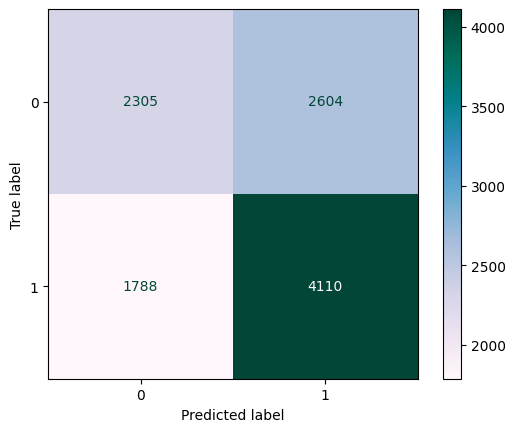

In [17]:
# confusion matrix
cm = confusion_matrix(test_y, pred_y, labels=NB_model.classes_)
# visualize the matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=NB_model.classes_)
cmd.plot(cmap='PuBuGn')
plt.show()

In [18]:
# true positive: 4086
# true negative: 2255
# false postivie: 2607
# false negative: 1859
precision = 4086/(4086 + 2607)
precision

0.6104885701479157